# Coursework 2
(core codebase to be imported as modules)

In [8]:
import numpy as np

from perceptron import Perceptron, KernelPerceptron
from kernels import polynomial_kernel, radial_basis_kernel
from utilities import train_test_split, data_split, y_encode

## Test for differentiating between 1s and 3s

In [7]:
idx = y!=2
X_z = X[idx,:]
y_z = y[idx]
y_z = (y_z == 1).astype(int) - (y_z == 3).astype(int)
n_1 = sum(y==1)
n_3 = sum(y==3)
print(n_1, n_3)

120 70


## DT's code

from utilities import preprocessing, train_test_split,y_encode,data_split

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

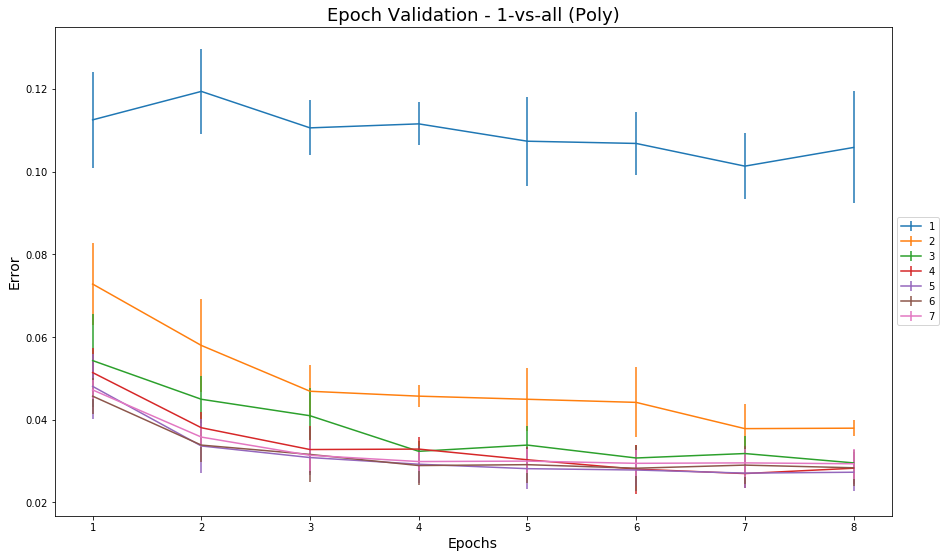

In [31]:
df = pd.read_csv('full_errors_poly.csv', header=None)
df_mean = df.loc[df.iloc[:,1]==99999]
df_std = df.loc[df.iloc[:,1]==-99999]

plt.figure(figsize=(15,9))
x = [i for i in range(1, 9)]
for d in range(1, 8):
    plt.errorbar(x,1-df_mean.iloc[d-1, 2:],yerr=df_std.iloc[d-1, 2:], label=d)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title("Epoch Validation - 1-vs-all (Poly)", fontsize=18)
plt.savefig('figures/epoch_val_1vsall_poly.jpg')
plt.show()

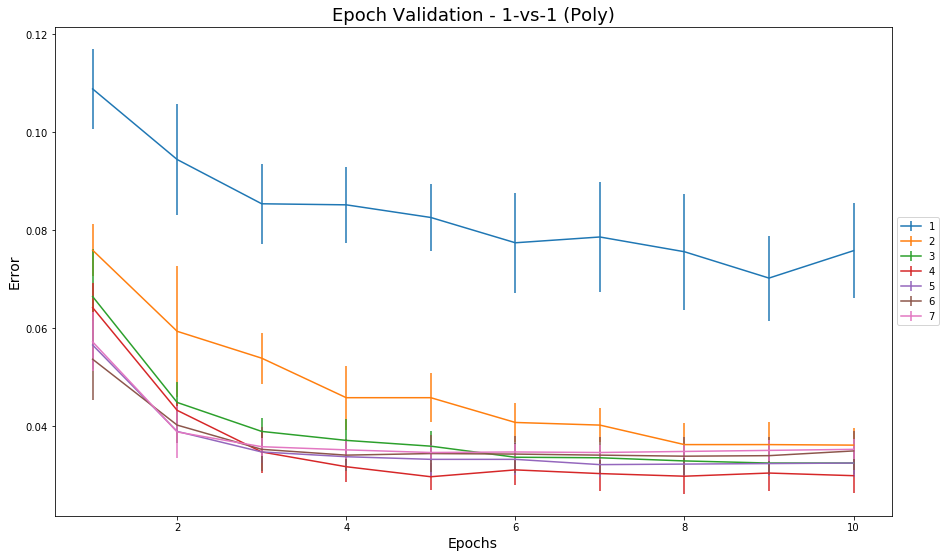

In [36]:
df = pd.read_csv('full_errors_1v1.csv', header=None)
df_mean = df.loc[df.iloc[:,1]==99999]
df_std = df.loc[df.iloc[:,1]==-99999]

plt.figure(figsize=(15,9))
x = [i for i in range(1, 11)]
for d in range(1, 8):
    plt.errorbar(x,1-df_mean.iloc[d-1, 2:],yerr=df_std.iloc[d-1, 2:], label=d)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title("Epoch Validation - 1-vs-1 (Poly)", fontsize=18)
plt.savefig('figures/epoch_val_1vs1_poly.jpg')
plt.show()

In [106]:
df = pd.read_csv('full_errors_gauss.csv', header=None)
df_mean = df.loc[df.iloc[:,1]==99999]
df_std = df.loc[df.iloc[:,1]==-99999]

In [107]:
df_mean

,0,1,2,3,4,5,6,7,8,9
0,0.001372,99999.0,0.874817,0.897830,0.897828,0.910521,0.918160,0.920629,0.922351,0.926870
2,0.004115,99999.0,0.931813,0.944075,0.940204,0.953433,0.957196,0.961606,0.961069,0.965477
4,0.012346,99999.0,0.948808,0.965154,0.970101,0.972790,0.973221,0.974619,0.974511,0.974511
6,0.037037,99999.0,0.954507,0.965154,0.966660,0.967843,0.967628,0.967628,0.967735,0.967413
8,0.111111,99999.0,0.929018,0.942677,0.943000,0.943000,0.942677,0.942569,0.942569,0.942569
10,0.333333,99999.0,0.918692,0.934718,0.937084,0.937730,0.937622,0.937622,0.937622,0.937622
12,1.000000,99999.0,0.915359,0.931276,0.932997,0.933104,0.933104,0.933104,0.933104,0.933104
14,3.000000,99999.0,0.913531,0.928265,0.929663,0.929771,0.929878,0.929878,0.929878,0.929878
16,9.000000,99999.0,0.832115,0.837278,0.837708,0.837815,0.837815,0.837815,0.837815,0.837815


In [113]:
x = list(range(-6, 3))
x

[-6, -5, -4, -3, -2, -1, 0, 1, 2]

In [119]:
df = pd.read_csv('full_errors_gauss.csv', header=None)
df_mean = df.loc[df.iloc[:,1]==99999]
df_std = df.loc[df.iloc[:,1]==-99999]

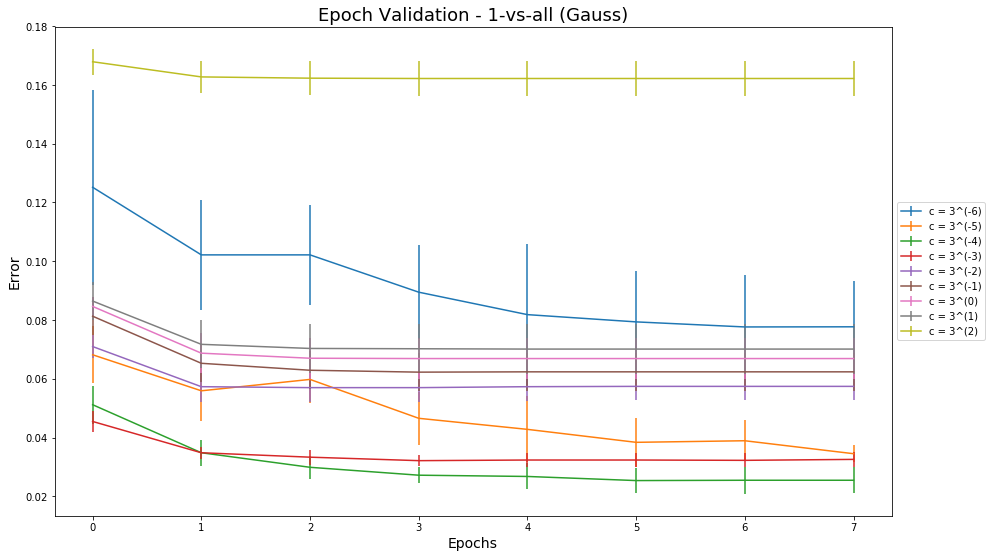

In [122]:
plt.figure(figsize=(15,9))
x = list(range(8))
gauss_c = [3**i for i in x]
for d in range(-6, 3):
    plt.errorbar(x,1-df_mean.iloc[d+6, 2:],yerr=df_std.iloc[d+6, 2:], label="c = 3^({})".format(d))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title("Epoch Validation - 1-vs-all (Gauss)", fontsize=18)
plt.savefig('figures/epoch_val_1vsall_gauss.jpg')
plt.show()

In [39]:
df = pd.read_csv('q1_test_errors_poly.csv')
q1_test_mean = df.mean(axis=0)
q1_test_std = df.std(axis=0)

In [44]:
q1_test_std

1.00000000000000000000    0.013597
2.00000000000000000000    0.004116
3.00000000000000000000    0.003053
4.00000000000000000000    0.002181
5.00000000000000000000    0.003112
6.00000000000000000000    0.002499
7.00000000000000000000    0.002632
dtype: float64

In [41]:
df = pd.read_csv('q1_train_errors_poly.csv')
q1_train_mean = df.mean(axis=0)
q1_train_std = df.std(axis=0)

In [43]:
q1_train_std

1.00000000000000000000    0.013344
2.00000000000000000000    0.001736
3.00000000000000000000    0.000231
4.00000000000000000000    0.000158
5.00000000000000000000    0.000094
6.00000000000000000000    0.000094
7.00000000000000000000    0.000092
dtype: float64

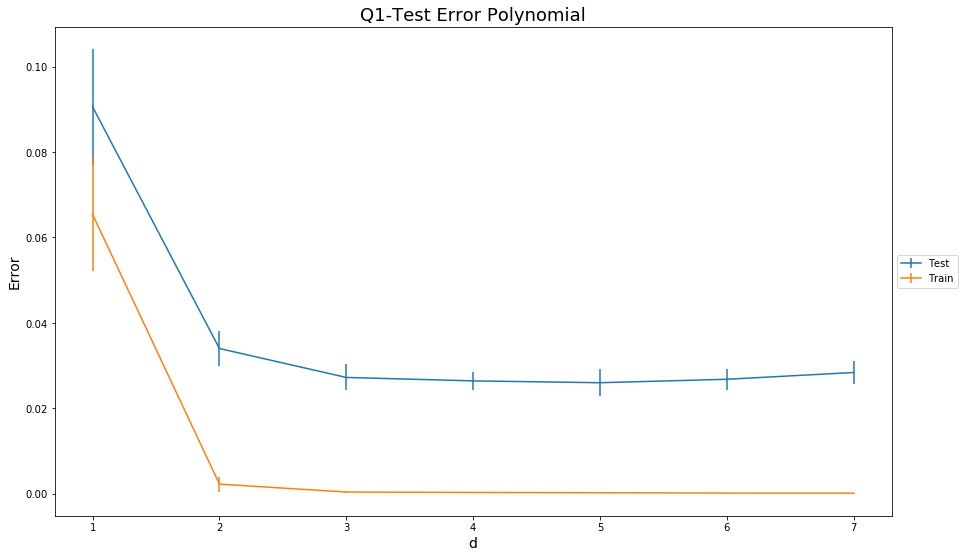

In [53]:
df = pd.read_csv('q1_test_errors_poly.csv')
q1_test_mean = df.mean(axis=0)
q1_test_std = df.std(axis=0)
df = pd.read_csv('q1_train_errors_poly.csv')
q1_train_mean = df.mean(axis=0)
q1_train_std = df.std(axis=0)

plt.figure(figsize=(15,9))
x = [i for i in range(1, 8)]
plt.errorbar(x,1-q1_test_mean,yerr=q1_test_std, label='Test')
plt.errorbar(x,1-q1_train_mean,yerr=q1_train_std, label='Train')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('d', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title("Q1-Test Error Polynomial", fontsize=18)
plt.savefig('figures/q1_poly.jpg')
plt.show()

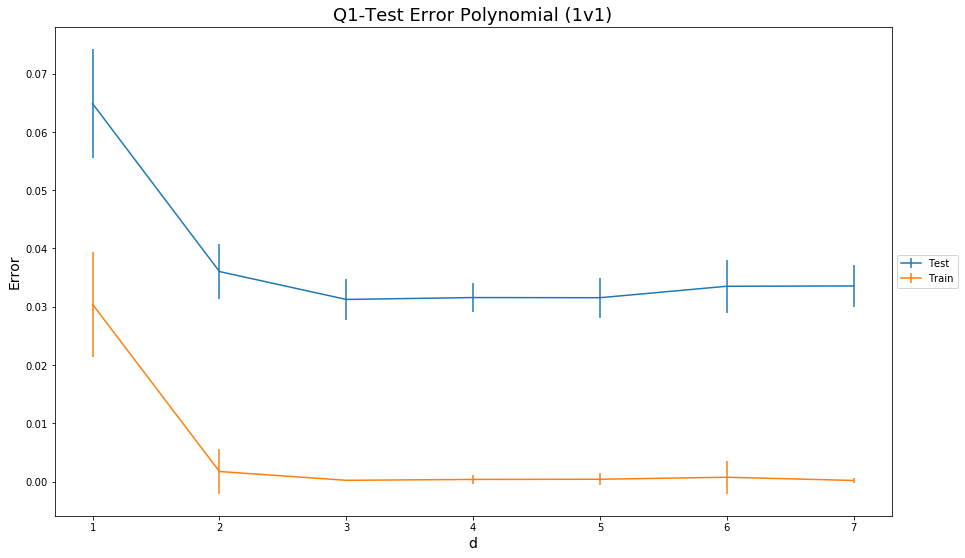

In [37]:
df = pd.read_csv('q1_test_errors_1v1.csv')
q1_test_mean = df.mean(axis=0)
q1_test_std = df.std(axis=0)
df = pd.read_csv('q1_train_errors_1v1.csv')
q1_train_mean = df.mean(axis=0)
q1_train_std = df.std(axis=0)

plt.figure(figsize=(15,9))
x = [i for i in range(1, 8)]
plt.errorbar(x,1-q1_test_mean,yerr=q1_test_std, label='Test')
plt.errorbar(x,1-q1_train_mean,yerr=q1_train_std, label='Train')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('d', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title("Q1-Test Error Polynomial (1v1)", fontsize=18)
plt.savefig('figures/q1_poly_1v1.jpg')
plt.show()

In [54]:
df = pd.read_csv('q1_train_errors_1v1.csv')
q1_test_mean = df.mean(axis=0)
q1_test_std = df.std(axis=0)

In [133]:
q1_train_std

0.00137174211248285312    0.013094
0.00411522633744856002    0.002563
0.01234567901234567833    0.000103
0.03703703703703703498    0.000263
0.11111111111111110494    0.000000
0.33333333333333331483    0.000000
1.00000000000000000000    0.000000
3.00000000000000000000    0.000000
9.00000000000000000000    0.000000
dtype: float64

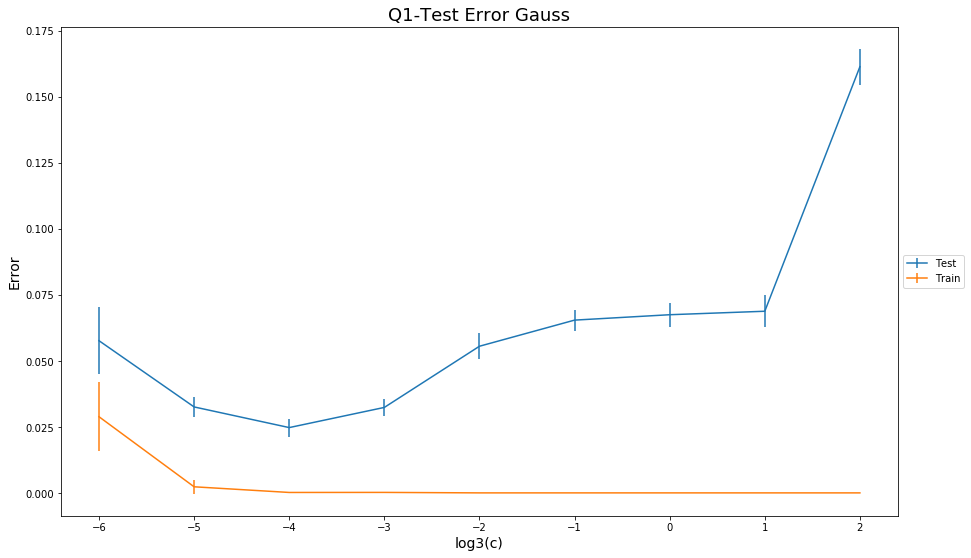

In [173]:
df = pd.read_csv('q1_test_errors_gauss.csv')
q1_test_mean = df.mean(axis=0)
q1_test_std = df.std(axis=0)
df = pd.read_csv('q1_train_errors_gauss.csv')
q1_train_mean = df.mean(axis=0)
q1_train_std = df.std(axis=0)

plt.figure(figsize=(15,9))
x = [i for i in range(-6, 3)]
plt.errorbar(x,1-q1_test_mean,yerr=q1_test_std, label='Test')
plt.errorbar(x,1-q1_train_mean,yerr=q1_train_std, label='Train')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('log3(c)', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title("Q1-Test Error Gauss", fontsize=18)
plt.savefig('figures/q1_gauss.jpg')
plt.show()

In [73]:
df = pd.read_csv("d_prime_errors_poly.csv", header=None)
mean_d = df.iloc[0,:].mean()
std_d = df.iloc[0,:].std()
print("Mean D: {} Std D: {}".format(mean_d, std_d))
mean_error = (1-df.iloc[2,:]).mean()
std_error = (1-df.iloc[2,:]).std()
print("Mean error: {} Std error: {}".format(mean_error, std_error))

Mean D: 4.85 Std D: 0.8127277008872492
Mean error: 0.026693548387096772 Std error: 0.0028517038519163284


In [38]:
df = pd.read_csv("d_prime_errors_1v1.csv", header=None)
mean_d = df.iloc[0,:].mean()
std_d = df.iloc[0,:].std()
print("Mean D: {} Std D: {}".format(mean_d, std_d))
mean_error = (1-df.iloc[2,:]).mean()
std_error = (1-df.iloc[2,:]).std()
print("Mean error: {} Std error: {}".format(mean_error, std_error))

Mean D: 4.05 Std D: 0.8255779474818965
Mean error: 0.03247311827956997 Std error: 0.003555154665194502


In [134]:
df = pd.read_csv("d_prime_errors_gauss.csv", header=None)
mean_d = df.iloc[0,:].mean()
std_d = df.iloc[0,:].std()
print("Mean D: {} Std D: {}".format(mean_d, std_d))
mean_error = (1-df.iloc[2,:]).mean()
std_error = (1-df.iloc[2,:]).std()
print("Mean error: {} Std error: {}".format(mean_error, std_error))

Mean D: 3.0 Std D: 0.0
Mean error: 0.06879032258064519 Std error: 0.0060738162543743585


In [78]:
df = pd.read_csv("knn_variable_selection.csv")

In [79]:
df

,0.96182795698924727912,0.96182795698924727912.1,0.96290322580645160144,0.96021505376344085114,0.96129032258064517347
0,0.972043,0.965054,0.967204,0.963978,0.964516
1,0.970430,0.966667,0.965591,0.961828,0.964516
2,0.965035,0.965573,0.968800,0.967187,0.968263
3,0.966649,0.966649,0.966111,0.968800,0.967187


In [82]:
df = pd.read_csv("knn_variable_selection_n_5.csv")

In [83]:
df

,0.19350188273265195305,0.19343733189887035717,0.19348036578805810626,0.19309306078536850326,0.19326519634211944410
0,0.387006,0.386878,0.386965,0.386191,0.386534


In [97]:
z= np.array([[1,2,3],[22.1,5.2,3],[1,2,2]])

In [103]:
np.argmax(z, axis=1)

array([2, 0, 1])

In [102]:
z[1][1][0]

IndexError: invalid index to scalar variable.

In [248]:
from sklearn.metrics import confusion_matrix

In [115]:
c_array

array([[ 0,  1,  8,  9,  6,  8, 16,  5,  6,  3],
       [ 0,  0,  1,  0, 15,  1, 13,  0, 11,  1],
       [15,  5,  0, 23, 35,  2,  2, 14, 13,  2],
       [ 9,  6, 22,  0,  2, 60,  0,  9, 27,  8],
       [ 3, 23, 21,  4,  0,  7, 16,  9,  2, 20],
       [30,  5, 11, 25, 11,  0, 18,  4, 11,  7],
       [28, 10,  6,  0, 13,  9,  0,  1,  7,  1],
       [ 1,  4, 15,  2, 22,  1,  0,  0,  9, 34],
       [14, 14, 16, 28, 15, 28,  9,  9,  0, 11],
       [ 7,  2,  7,  4, 42,  4,  0, 32,  3,  0]])

In [114]:
c_array.sum(1)

array([ 62,  42, 111, 143, 105, 122,  75,  88, 144, 101])

In [238]:
confusion = pd.read_csv("confusion_poly.csv", header=None)

In [239]:
confusion.shape

(993, 2)

In [241]:
993/20

49.65

In [246]:
z = list(range(0, 993,49))
z[-1] = 993
z

[0,
 49,
 98,
 147,
 196,
 245,
 294,
 343,
 392,
 441,
 490,
 539,
 588,
 637,
 686,
 735,
 784,
 833,
 882,
 931,
 993]

In [292]:
arrays = []
for i in range(len(z)-1):
    c = confusion.iloc[z[i]:z[i+1]]
    if i % 2 == 0:
        c_array = confusion_matrix(y_true = c.iloc[:,1], y_pred=c.iloc[:,0])
    else: 
        c_array = confusion_matrix(y_true = c.iloc[:,1], y_pred=c.iloc[:,0])
    arrays.append(c_array)

In [293]:
pd.DataFrame(np.mean(arrays, 0)).sum().sum()

57.129999999999995

In [313]:
(pd.DataFrame(np.mean(arrays, 0))).round(2).astype(str) + '+/-' +pd.DataFrame(np.std(arrays, 0)).round(2).astype(str)

,0,1,2,3,4,5,6,7,8,9
0,0.0+/-0.0,0.06+/-0.24,0.46+/-0.77,0.51+/-0.77,0.35+/-0.54,0.46+/-0.57,0.94+/-1.11,0.28+/-0.49,0.34+/-0.63,0.18+/-0.42
1,0.0+/-0.0,0.0+/-0.0,0.06+/-0.26,0.0+/-0.0,0.86+/-0.7,0.06+/-0.26,0.73+/-0.73,0.0+/-0.0,0.64+/-0.58,0.06+/-0.26
2,0.85+/-1.0,0.28+/-0.6,0.0+/-0.0,1.33+/-1.58,2.03+/-1.11,0.11+/-0.33,0.12+/-0.52,0.81+/-0.98,0.75+/-0.65,0.12+/-0.35
3,0.53+/-0.78,0.35+/-0.54,1.27+/-1.13,0.0+/-0.0,0.12+/-0.35,3.44+/-1.86,0.0+/-0.0,0.52+/-0.69,1.56+/-1.34,0.46+/-0.69
4,0.17+/-0.41,1.3+/-1.13,1.19+/-1.1,0.23+/-0.46,0.0+/-0.0,0.4+/-0.64,0.92+/-1.14,0.52+/-0.69,0.12+/-0.35,1.16+/-1.3
5,1.73+/-1.55,0.28+/-0.59,0.62+/-0.75,1.45+/-1.09,0.64+/-0.96,0.0+/-0.0,1.03+/-1.09,0.24+/-0.48,0.64+/-0.69,0.38+/-1.0
6,1.58+/-1.21,0.59+/-1.1,0.34+/-0.62,0.0+/-0.0,0.76+/-0.77,0.51+/-0.83,0.0+/-0.0,0.06+/-0.26,0.39+/-0.64,0.06+/-0.26
7,0.06+/-0.26,0.24+/-0.47,0.87+/-0.98,0.12+/-0.35,1.27+/-1.14,0.06+/-0.24,0.0+/-0.0,0.0+/-0.0,0.53+/-0.7,1.94+/-1.23
8,0.8+/-1.1,0.81+/-0.99,0.92+/-0.93,1.58+/-1.23,0.85+/-0.78,1.62+/-1.19,0.52+/-0.93,0.53+/-0.8,0.0+/-0.0,0.62+/-1.03
9,0.4+/-0.65,0.11+/-0.33,0.4+/-0.66,0.23+/-0.46,2.38+/-1.48,0.24+/-0.81,0.0+/-0.0,1.88+/-1.59,0.17+/-0.41,0.0+/-0.0


In [275]:
pd.DataFrame(np.mean(arrays, 0)).sum().sum()

49.650000000000006

In [272]:
pd.DataFrame(np.std(arrays, 0))

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.217945,0.663325,0.668954,0.458258,0.489898,0.927362,0.433013,0.556776,0.357071
1,0.000000,0.000000,0.217945,0.000000,0.622495,0.217945,0.653835,0.000000,0.497494,0.217945
2,0.887412,0.536190,0.000000,1.388344,0.942072,0.300000,0.435890,0.842615,0.572276,0.300000
3,0.668954,0.458258,0.994987,0.000000,0.300000,1.612452,0.000000,0.589491,1.152172,0.583095
4,0.357071,1.013657,0.973396,0.400000,0.000000,0.572276,0.979796,0.589491,0.300000,1.095445
5,1.360147,0.536190,0.668954,0.942072,0.804674,0.000000,0.943398,0.400000,0.589491,0.909670
6,1.113553,0.921954,0.556776,0.000000,0.653835,0.739932,0.000000,0.217945,0.572276,0.217945
7,0.217945,0.400000,0.829156,0.300000,0.994987,0.217945,0.000000,0.000000,0.589491,1.100000
8,0.953939,0.842615,0.812404,1.113553,0.698212,1.019804,0.804674,0.668954,0.000000,0.920598
9,0.572276,0.300000,0.572276,0.400000,1.337909,0.678233,0.000000,1.319091,0.357071,0.000000


In [249]:
confusion = pd.read_csv("confusion_poly.csv", header=None)
c_array = confusion_matrix(y_true = confusion.iloc[:,1], y_pred=confusion.iloc[:,0])


In [260]:
np.mean([np.array([[[1,1],[1,1]],[[4,4],[4,4]]])],1)

array([[[2.5, 2.5],
        [2.5, 2.5]]])

In [252]:
df = pd.DataFrame(c_array)
df_2 = df

,0,1,2,3,4,5,6,7,8,9
0,0,1,8,9,6,8,16,5,6,3
1,0,0,1,0,15,1,13,0,11,1
2,15,5,0,23,35,2,2,14,13,2
3,9,6,22,0,2,60,0,9,27,8
4,3,23,21,4,0,7,16,9,2,20
5,30,5,11,25,11,0,18,4,11,7
6,28,10,6,0,13,9,0,1,7,1
7,1,4,15,2,22,1,0,0,9,34
8,14,14,16,28,15,28,9,9,0,11
9,7,2,7,4,42,4,0,32,3,0


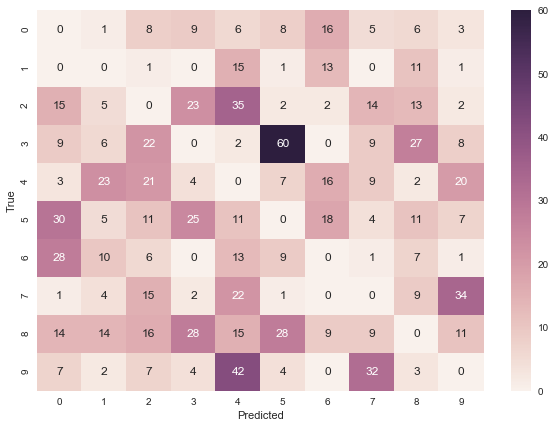

In [209]:
confusion = pd.read_csv("confusion_poly.csv", header=None)
c_array = confusion_matrix(y_true = confusion.iloc[:,1], y_pred=confusion.iloc[:,0])
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(pd.DataFrame(c_array), annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [108]:
confusion

,0,1
0,3,8
1,0,6
2,5,3
3,0,5
4,6,4
5,4,1
6,5,8
7,9,7
8,9,8
9,9,5


In [4]:
df = pd.read_csv('lr_tol_variable_selection_w_reg_0.1.csv', header=None)


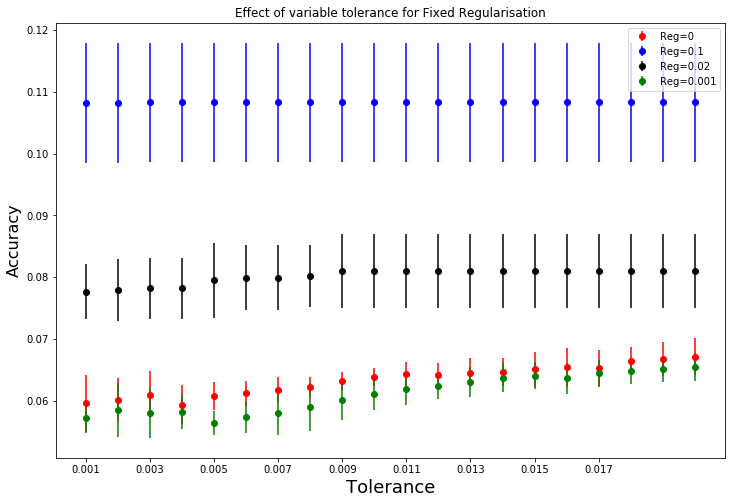

In [103]:
df = pd.read_csv('lr_tol_variable_selection_w_reg_0.0.csv', header=None)
mean_0 = df.mean(0)
std_0 = df.std(0)
df_02 = pd.read_csv('lr_tol_variable_selection_w_reg_0.02.csv', header=None)
mean_02 = df_02.mean(0)
std_02 = df_02.std(0)
df_001 = pd.read_csv('lr_tol_variable_selection_w_reg_0.001.csv', header=None)
mean_001 = df_001.mean(0)
std_001 = df_001.std(0)
%matplotlib inline
fig = plt.figure(figsize=(12,8))
# plt.plot(range(1, 11)*0.001, mean)
x = [0.001*(tol+1) for tol in range(0, 20, 1)]
plt.title('Effect of variable tolerance for Fixed Regularisation')
plt.errorbar(x,1-mean_0,yerr=std_0, fmt='ro', label='Reg=0')
plt.errorbar(x,1-mean_01,yerr=std_01, fmt='bo', label='Reg=0.1')
plt.errorbar(x,1-mean_02,yerr=std_02, fmt='ko', label='Reg=0.02')
plt.errorbar(x,1-mean_001,yerr=std_001, fmt='go', label='Reg=0.001')

plt.xlabel('Tolerance', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc='upper right')
plt.xticks(np.arange(0.001, 0.019, 0.002));
plt.savefig('figures/tol_validation.jpg')

In [25]:
# reg_list = [2**(-i) for i in range(1, 11)]
# header= ["log2(-{})".format(i) for i in range(1, 11)]
import pandas as pd
df = pd.read_csv('lr_reg_variable_selection_n_10.csv', header=None)

In [26]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.909605,0.919209,0.924307,0.924984,0.925619,0.926469,0.926587,0.926458,0.926512,0.926544
1,0.006858,0.006563,0.007153,0.010158,0.009460,0.007766,0.007162,0.007130,0.007153,0.007190


In [36]:
df.loc[0,6:] = [0.92563, 0.925, 0.923, 0.921]

In [46]:
temp = [4 ,4 ,6, 8 ,6 ,5, 5, 5 ,3, 8]
temp = [2**(-(i+5)) for i in temp]
print("LR Mean: {} LR Std: {}".format(np.mean(temp), np.std(temp)))

LR Mean: 0.0011962890625 LR Std: 0.0010929213518359078


In [47]:
np.log2(0.001196)

-9.70756689512607

In [48]:
reg_mean = pd.read_csv("lr_reg_mean.csv", header=None)

In [53]:
(1-reg_mean).max(axis=0).std()

0.004310011297390222

In [160]:
knn = pd.read_csv('knn_q1.csv', header=None).iloc[0:5,:]
knn.columns = [1,3,7,9,27] 
knn

,1,3,7,9,27
0,0.968280,0.966129,0.961290,0.959140,0.941398
1,0.967204,0.963441,0.958602,0.958065,0.940323
2,0.967742,0.967742,0.956989,0.956989,0.939785
3,0.969892,0.971505,0.965054,0.963978,0.943548
4,0.966129,0.964516,0.960753,0.956452,0.939785


In [167]:
knn_mean = knn.mean(axis=0)
knn_std = knn.std(axis=0)/np.sqrt(4)

In [172]:
knn_std

1     0.000696
3     0.001579
7     0.001528
9     0.001504
27    0.000793
dtype: float64

/Users/danielmanela/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


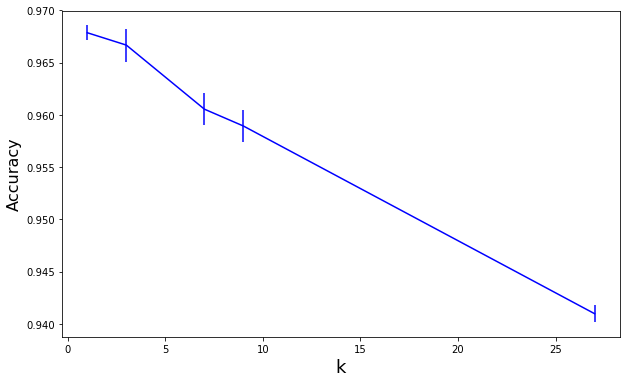

In [170]:
x = [1,3,7,9,27]
fig = plt.figure(figsize=(10,6))
plt.errorbar(x,knn_mean,yerr=knn_std, fmt='b')
plt.xlabel('k', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend()
plt.savefig('figures/knn_test_errors.jpg')
plt.show()

In [195]:
from perceptron import VectorisedKernelPerceptron
from kernels import polynomial_kernel, radial_basis_kernel
from utilities import data_split, y_encode, perceptron_learning
from utilities import stratified_k_fold, vectorised_p_strat_kfold

data = np.loadtxt("zipcombo.dat")
X,y = data_split(data,y_col=0)     
P = VectorisedKernelPerceptron(polynomial_kernel, k_params=5)

In [215]:
P.train(X, y)

In [216]:
y_pred = P.predict(X)
(y_pred == y).mean()

0.994945149494515

In [217]:
probs = P.predict_proba(X)
y_pred = P.predict(X)
index = y_pred != y

In [218]:
z = pd.DataFrame(np.vstack([y, y_pred, np.max(probs, axis=1)]).T)
z.loc[z.loc[:,0]!=z.loc[:,1]].sort_values(by=2, ascending=False).head(20)

,0,1,2
5296,4.0,1.0,7.220940e+11
8261,4.0,1.0,4.068230e+11
3037,4.0,1.0,2.721126e+11
5145,8.0,1.0,1.826479e+11
5679,2.0,1.0,1.758446e+11
2340,4.0,1.0,1.536508e+11
3366,5.0,3.0,1.515766e+11
680,4.0,1.0,1.455520e+11
2342,3.0,1.0,1.451134e+11
2343,2.0,1.0,1.351931e+11


In [219]:
(z.iloc[:,0]==3).shape

(9298,)

In [220]:
(z.iloc[:,1]==5).shape

(9298,)

In [227]:
z.loc[(z.iloc[:,0]==3)].loc[z.iloc[:,1]==5].head(10)

,0,1,2
4729,3.0,5.0,3.358730e+10
7947,3.0,5.0,4.809482e+10


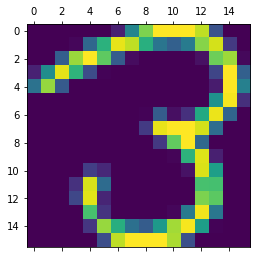

In [231]:
plt.matshow(X[4729,:].reshape((16,16)))
plt.show()

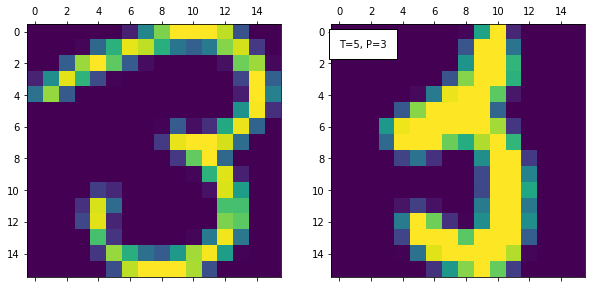

In [237]:
fig, ((ax0, ax1)) =  plt.subplots(1,2,figsize=(10,10))
ax0.matshow(X[4729,:].reshape((16,16)))
# ax0.text(0,1, 'T=3, P=5', bbox={'facecolor': 'white', 'pad': 10})
ax1.matshow(X[3366,:].reshape((16,16)))
ax1.text(0,1, 'T=5, P=3', bbox={'facecolor': 'white', 'pad': 10})
# ax2.matshow(X[5145,:].reshape((16,16)))
# ax2.text(0,1, 'T=8, P=1', bbox={'facecolor': 'white', 'pad': 10})
# ax3.matshow(X[8261,:].reshape((16,16)))
# ax3.text(0,1, 'T=4, P=1', bbox={'facecolor': 'white', 'pad': 10})
# ax4.matshow(X[7947,:].reshape((16,16)))
# ax4.text(0,1, 'T=3, P=5', bbox={'facecolor': 'white', 'pad': 10})
plt.show()

In [115]:
q = pd.read_csv("lr_q1_train.csv", header=None)

In [113]:
pd.read_csv("lr_q1_test.csv", header=None).head()

,0,1,2,3,4,5,6,7,8,9
0,0.909140,0.919892,0.929032,0.935484,0.933333,0.933871,0.932258,0.934409,0.927419,0.934409
1,0.926882,0.932796,0.941935,0.947312,0.948925,0.947312,0.946774,0.946774,0.946774,0.946774
2,0.922581,0.931720,0.941398,0.949462,0.947312,0.946774,0.947312,0.946237,0.946237,0.946237
3,0.925806,0.932258,0.941398,0.946237,0.946237,0.943548,0.945161,0.940323,0.941398,0.941398
4,0.915054,0.927957,0.937097,0.938172,0.939785,0.939247,0.938710,0.938710,0.938710,0.938710


In [121]:
pd.read_csv("lr_reg_mean.csv", header=None)

,0,1,2,3,4,5,6,7,8,9
0,0.909767,0.920199,0.925469,0.927190,0.929019,0.928696,0.928588,0.928696,0.928696,0.928588
1,0.909336,0.918263,0.923532,0.927081,0.929017,0.928695,0.927619,0.927511,0.927619,0.927511
2,0.907615,0.918370,0.924286,0.924609,0.924394,0.927728,0.927728,0.926975,0.927190,0.927405
3,0.910841,0.919552,0.919874,0.918908,0.921274,0.921059,0.921597,0.921597,0.921705,0.921705
4,0.909550,0.918692,0.924930,0.927941,0.929017,0.928802,0.929125,0.929017,0.929125,0.929125
5,0.909229,0.918585,0.925469,0.924393,0.921383,0.926544,0.926329,0.926114,0.926114,0.926222
6,0.907722,0.919768,0.924178,0.926867,0.927727,0.928588,0.927835,0.927942,0.928157,0.928265
7,0.909444,0.920630,0.925684,0.923104,0.926760,0.926760,0.926760,0.926330,0.926115,0.926115
8,0.910520,0.918693,0.924608,0.926866,0.924286,0.924500,0.924716,0.924823,0.924716,0.924823
9,0.912023,0.919336,0.925037,0.922884,0.923316,0.923316,0.925574,0.925574,0.925682,0.925682


In [120]:
1-q.mean(0)

0    0.075000
1    0.061656
2    0.048326
3    0.037611
4    0.033591
5    0.034841
6    0.040340
7    0.041026
8    0.043500
9    0.042841
dtype: float64

In [127]:
for i, term in enumerate(z):
    print(i, term)

0 0.01
1 0.1
2 1
3 10
4 100


In [122]:
z = [0.01,0.1,1,10,100]

In [128]:
np.std(z)

39.06897408430377

In [129]:
y = [0.9332974717590102, 0.9332974717590102, 0.9332974717590102, 0.9332974717590102, 0.9332974717590102]

In [130]:
np.std(y)

1.1102230246251565e-16

In [125]:
index = [z[i] for i in y]

In [126]:
index

[0.1, 0.1, 10, 10, 10]

In [88]:
1-q

,0
0,0.997380
1,0.998151
2,0.998503
3,0.996897
4,0.994204
5,0.993125
6,0.989858
7,0.994049
8,0.991811
9,0.993150


In [94]:
z=np.array([[[1,1],[1,1]],[[2,2],[2,2]], [[3,3],[3,3]],[[4,4],[4,4]]])

In [95]:
np.mean(z, 0)

array([[2.5, 2.5],
       [2.5, 2.5]])

In [58]:
1-q.std(axis=1)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
dtype: float64

In [138]:
from datetime import datetime

import numpy as np

from perceptron import VectorisedKernelPerceptron
from kernels import polynomial_kernel, radial_basis_kernel
from utilities import data_split, y_encode, perceptron_learning
from utilities import stratified_k_fold, vectorised_p_strat_kfold
import scipy
data = np.loadtxt("zipcombo.dat")
X,y = data_split(data,y_col=0)


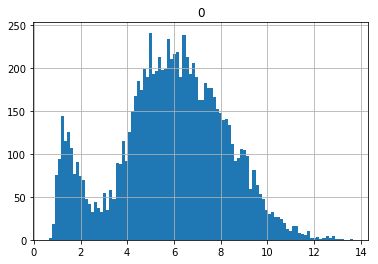

CPU times: user 30.7 s, sys: 2.06 s, total: 32.7 s
Wall time: 34.1 s


In [139]:
%%time
pair_dist = scipy.spatial.distance.pdist(X)
z = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X))
z = z + np.eye(z.shape[0])*1000
z.min(axis=0).mean() # 5.853115399088565
pd.DataFrame(z.min(axis=0)).hist(bins=100)
plt.show()

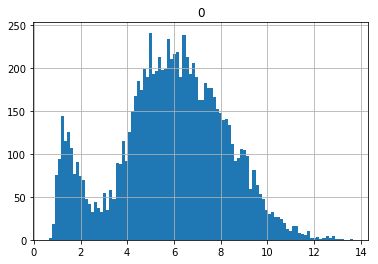

In [140]:
pd.DataFrame(z.min(axis=0)).hist(bins=100)
plt.show()

In [147]:
(2*3**(-4))**(-0.5)

6.363961030678928

In [144]:
(2*np.mean(z.min(axis=0))**2)**(-1)

0.0145947221346954

In [150]:
np.std(z.min(axis=0))

2.3474210534668165

In [156]:
pair_dist.shape

(43221753,)

In [158]:
pair_dist[:5]

array([16.2600679 , 15.83700332, 17.93563905, 16.23057756, 14.38692389])

In [157]:
X.shape

(9298, 256)

In [4]:
A = np.array([[1,2,3],[1,1,1],[0,0,0]])

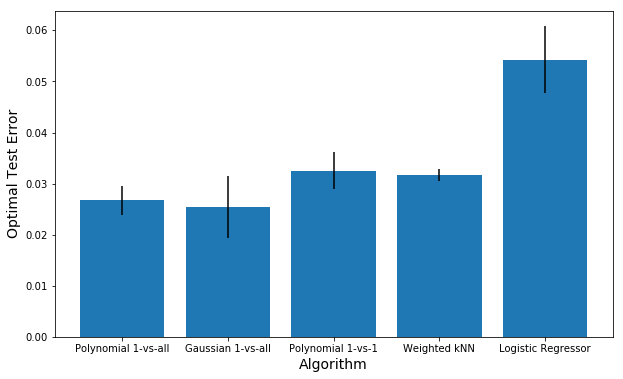

In [310]:
labels_str = ['Polynomial 1-vs-all', 'Gaussian 1-vs-all', 'Polynomial 1-vs-1', 'Weighted kNN', 'Logistic Regressor']
labels = [1,2,3,4,5]

mean_vals = [0.0267, 0.0254, 0.0325, 0.03172, 0.05427]
std_vals = [0.0029, 0.0061, 0.0036, 0.0012, 0.00656]
plt.figure(figsize=(10,6))
plt.bar(labels, mean_vals, yerr=std_vals)
plt.xticks(labels, labels_str)
plt.ylabel('Optimal Test Error', fontsize=14)
plt.xlabel('Algorithm',fontsize=14)
plt.savefig("figures/algorithm_test_errors.jpg")
plt.show()

In [ ]:
        1-vs-all - Polynomial & $0.0267 \pm 0.0029$  \\% inserting body of the table
        1-vs-all - Gaussian & $0.0254 \pm 0.0061$ \\
        1-vs-1 - Polynomial & $0.0325 \pm 0.0036$ \\ 
        kNN & $0.03172 \pm 0.00012$\\
        Logistic Regression & $0.05427 \pm 0.00656$ \\